In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [295]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Columns Information
1. credit.policy - 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose - The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
3. int.rate - The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment - The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc - [Why take the ln of annual income?](https://stats.stackexchange.com/questions/61002/natural-log-of-annual-income)
6. dti - The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico - [What is a FICO Score?](https://www.myfico.com/credit-education/what-is-a-fico-score)
8. days.with.cr.line - The number of days the borrower has had a credit line.
9. revol.bal - The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util - The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths - The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs - The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. public.rec - The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
14. not.fully.paid - We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.


## I. Exploratory Data Analysis

#### Are there any missing values within the dataset?

[Text(0.5, 1.0, 'Null/Missing Values')]

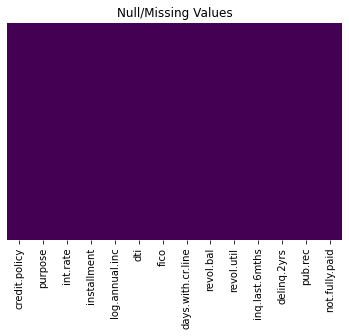

In [296]:
sns.heatmap(
    df.isnull(),
    yticklabels = False,
    cbar = False,
    cmap = 'viridis'
).set(title='Null/Missing Values')

The heatmap shows that there are no missing data within the dataset. 

#### Feat_1: Credit Policy

[Text(0.5, 1.0, 'Credit Policy Count Distribution')]

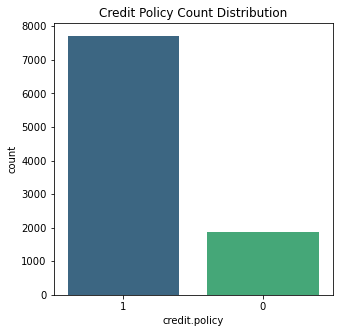

In [297]:
plt.figure(figsize=(5,5))
sns.countplot(
    x = 'credit.policy', 
    data = df, 
    palette = 'viridis',
    order = df['credit.policy'].value_counts().index
).set(title='Credit Policy Count Distribution')

Majority of the customers meets the underwriting criteria of Lending.com

#### Feat_2: Purpose

[Text(0.5, 1.0, 'Credit Policy Count Distribution')]

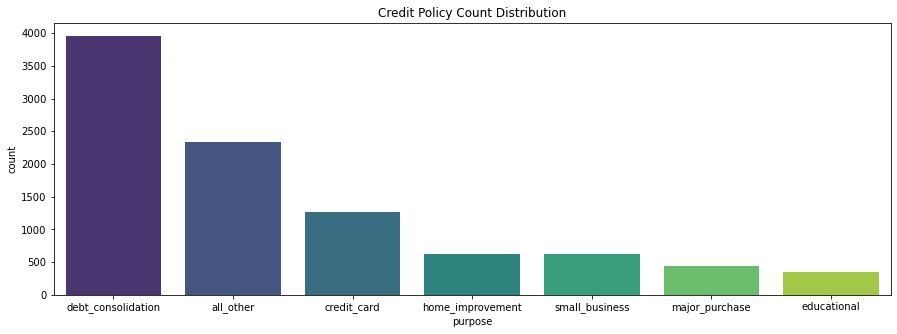

In [298]:
plt.figure(figsize=(15,5))
sns.countplot(
    x = 'purpose',
    data = df, 
    palette = 'viridis',
    order = df['purpose'].value_counts().index
).set(title='Credit Policy Count Distribution')

In [299]:
df['purpose'].describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

#### Feat_3: Interest Rate

<AxesSubplot:xlabel='int.rate', ylabel='Count'>

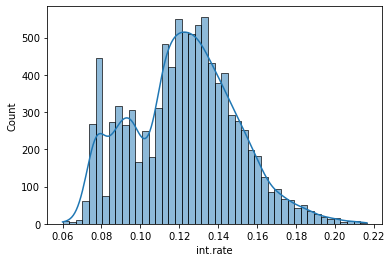

In [300]:
sns.histplot(x='int.rate', data=df, kde=True)

In [301]:
df['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

count    9578.000000
mean        0.348055
std         0.038702
min         0.244949
25%         0.322335
50%         0.349428
75%         0.375100
max         0.465188
Name: int.rate, dtype: float64

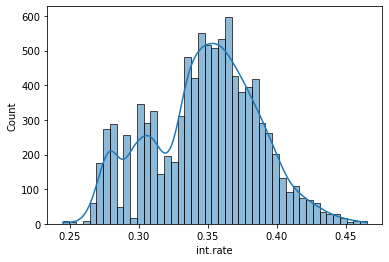

In [302]:
data_transform = np.sqrt(df['int.rate'] )
sns.histplot(data=df, x=data_transform, kde=True)
data_transform.describe()

#### Feat_4: Installment

<AxesSubplot:xlabel='installment', ylabel='Count'>

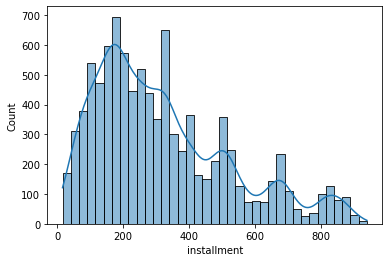

In [303]:
sns.histplot(x='installment', data=df, kde=True)

In [304]:
df['installment'].describe()

count    9578.000000
mean      319.089413
std       207.071301
min        15.670000
25%       163.770000
50%       268.950000
75%       432.762500
max       940.140000
Name: installment, dtype: float64

count    9578.000000
mean        5.530543
std         0.734550
min         2.751748
25%         5.098463
50%         5.594525
75%         6.070189
max         6.846029
Name: installment, dtype: float64

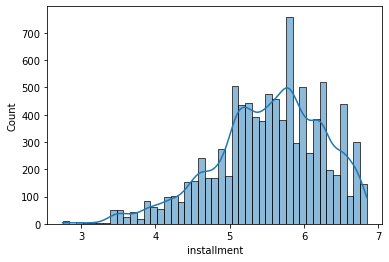

In [305]:
data_transform = np.log(df['installment'] )
sns.histplot(data=df, x=data_transform, kde=True)
data_transform.describe()

#### Feat_5: Annual Income (Log N)

<AxesSubplot:xlabel='log.annual.inc', ylabel='Count'>

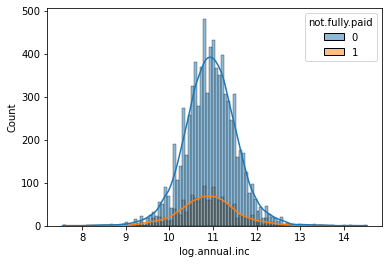

In [306]:
sns.histplot(x='log.annual.inc', data=df, hue='not.fully.paid', kde=True)

#### Feat_6: Debt to Income Ratio

<AxesSubplot:xlabel='dti', ylabel='Count'>

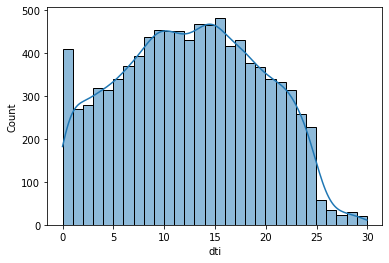

In [307]:
sns.histplot(x='dti', data=df, kde=True)

#### Feat_7: FICO Score

<AxesSubplot:xlabel='fico', ylabel='Count'>

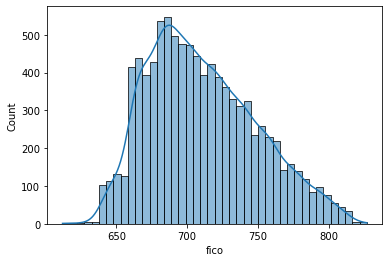

In [308]:
sns.histplot(x='fico', data=df, kde=True)

#### Feat_8: Credit Line Age in Days

<AxesSubplot:xlabel='days.with.cr.line', ylabel='Count'>

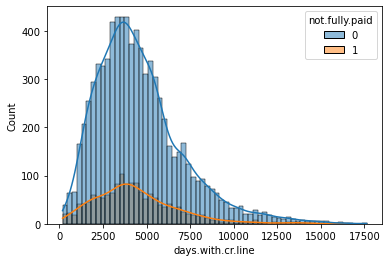

In [309]:
sns.histplot(x='days.with.cr.line', data=df, hue='not.fully.paid', kde=True)

#### Feat_9: Revolving Balance

<AxesSubplot:xlabel='revol.bal', ylabel='Count'>

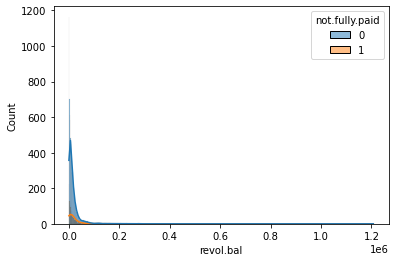

In [310]:
sns.histplot(x='revol.bal', data=df, hue='not.fully.paid', kde=True)

#### Feat_10: Revolving Line Utilization Rate

<AxesSubplot:xlabel='revol.util', ylabel='Count'>

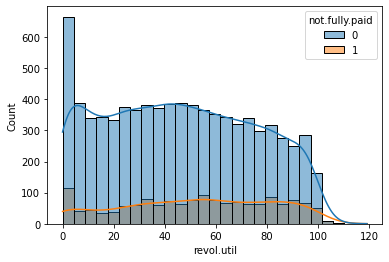

In [311]:
sns.histplot(x='revol.util', data=df, hue='not.fully.paid', kde=True)

#### Feat_12: Number of times the borrower had been 30+ days overdue on payment in the past 2 years

<AxesSubplot:xlabel='delinq.2yrs', ylabel='Count'>

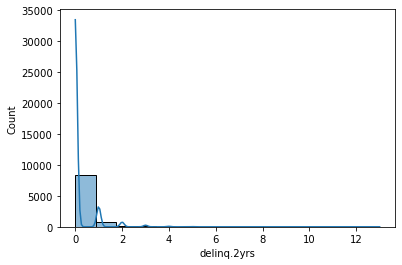

In [312]:
sns.histplot(x='delinq.2yrs', data=df, kde=True)

#### Feat_13: Borrowers number of derogatory public records

<AxesSubplot:xlabel='pub.rec', ylabel='Count'>

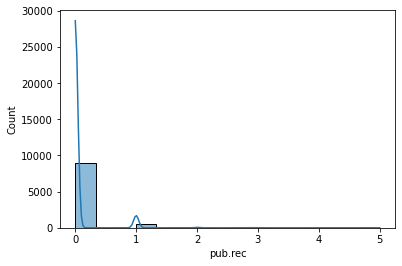

In [313]:
sns.histplot(x='pub.rec', data=df, kde=True)

#### Feat_14: Not Fully Paid

[Text(0.5, 1.0, 'Credit Policy Count Distribution')]

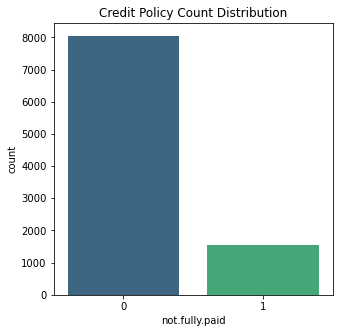

In [314]:
plt.figure(figsize=(5,5))
sns.countplot(
    x = 'not.fully.paid',
    data = df, 
    palette = 'viridis',
    order = df['not.fully.paid'].value_counts().index
).set(title='Credit Policy Count Distribution')

The dataset seems to be imbalanced. It seems that majority of the customers were able to fully paid their loan.

<AxesSubplot:>

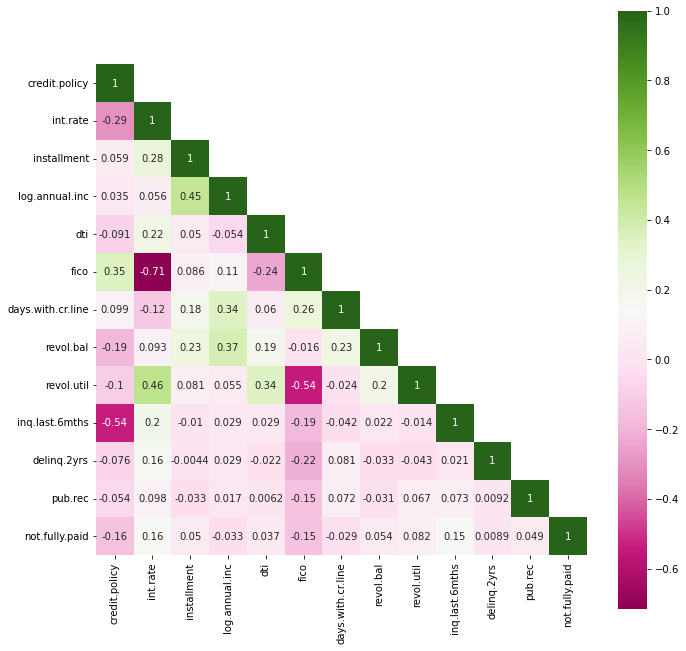

In [315]:
corr_mat = df.corr()
mask = np.triu(corr_mat, 1)
plt.figure(figsize=(11,11))
sns.heatmap(corr_mat, cmap='PiYG', annot=True, square=True, mask=mask)

Features with High Correlation

Credit Policy And FICO Score

<AxesSubplot:xlabel='fico', ylabel='Count'>

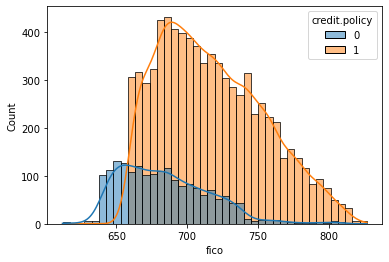

In [316]:
sns.histplot(data=df, x='fico', hue='credit.policy', kde=True)

Credit Policy And Inq.last. 6 mnths

<AxesSubplot:xlabel='inq.last.6mths', ylabel='Count'>

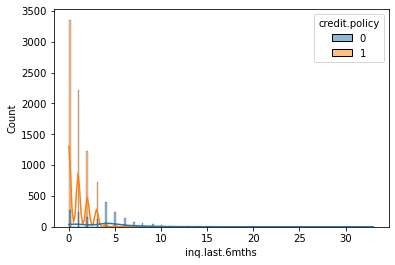

In [317]:
sns.histplot(data=df, x='inq.last.6mths', hue='credit.policy', kde=True)

Interest Rate and FICO

<AxesSubplot:xlabel='fico', ylabel='int.rate'>

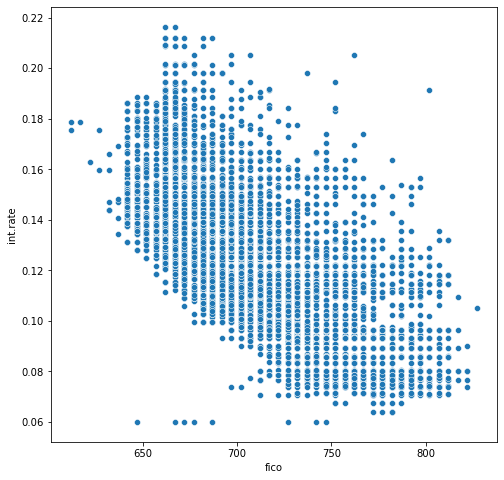

In [318]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='fico', y='int.rate')

It seems that there is a relationship between the interest rate applied in loans and the customer's FICO score. The higher the FICO Score, the lower the interest rate is applied in a loan.

#### Interest Rate and Credit Utilization Ratio

<AxesSubplot:xlabel='revol.util', ylabel='int.rate'>

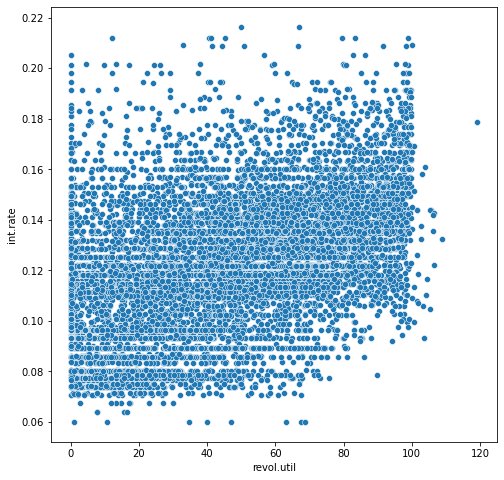

In [319]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='revol.util', y='int.rate')

The scatter plot shows the relationship between interest rate and revolving line utiliztion rate. It appear that having low credit utilization ratio would give a customer lower interest rate, and vice versa.
Why?

#### Installment and Annual Income

<AxesSubplot:xlabel='log.annual.inc', ylabel='installment'>

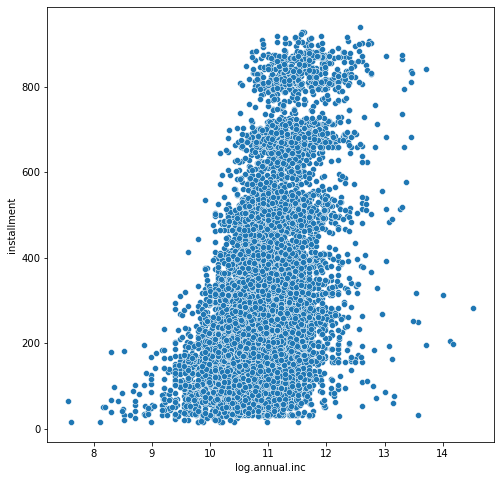

In [320]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='log.annual.inc', y='installment')

Based on the scatter plot, it appears that the higher the income of the customer gets, the higher monthly installment could be applied to the customer's loan.

#### FICO Score and Credit Utilization Ratio

<AxesSubplot:xlabel='revol.util', ylabel='fico'>

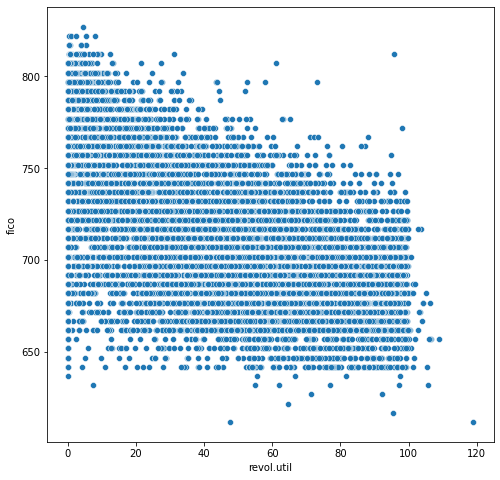

In [321]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='revol.util', y='fico')

Based on the scatter plot, it seems that high FICO Scores have tend to have lower Credit Utilization Ratio.

<AxesSubplot:xlabel='inq.last.6mths', ylabel='Count'>

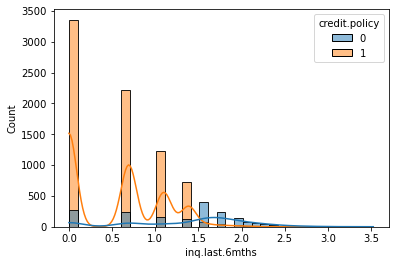

In [322]:
transform = np.log(df['inq.last.6mths'] + 1)
sns.histplot(data=df, x=transform, hue='credit.policy', kde=True)

<AxesSubplot:xlabel='revol.bal', ylabel='Count'>

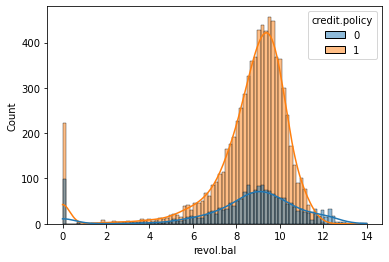

In [323]:
transform= np.log(df['revol.bal'] + 1)
sns.histplot(data=df, x=transform, hue='credit.policy', kde=True)

<AxesSubplot:>

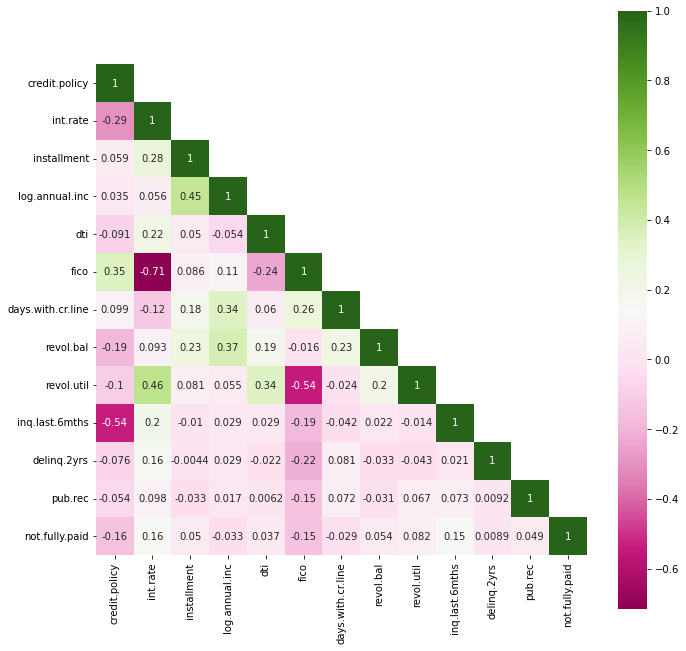

In [324]:
corr_mat = df.corr()
mask = np.triu(corr_mat, 1)
plt.figure(figsize=(11,11))
sns.heatmap(corr_mat, cmap='PiYG', annot=True, square=True, mask=mask)

## II. Data Cleaning and Feature Selection

### One Hot Encoding

In [325]:
purpose_df = pd.get_dummies(df.purpose, prefix='purpose')
purpose_df['target'] = df['not.fully.paid']
purpose_df

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,target
0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0,1
9574,1,0,0,0,0,0,0,1
9575,0,0,1,0,0,0,0,1
9576,0,0,0,0,1,0,0,1


### Pearson Correlation

In [326]:
corr_mat = purpose_df.corr()
purpose_class_corr = np.abs(corr_mat['target']).sort_values(ascending=False)
purpose_class_corr.drop('target', inplace = True)
purpose_class_corr

purpose_small_business        0.084460
purpose_credit_card           0.047136
purpose_major_purchase        0.028580
purpose_educational           0.021609
purpose_debt_consolidation    0.017543
purpose_all_other             0.009233
purpose_home_improvement      0.007272
Name: target, dtype: float64

In [327]:
corr_mat = df.corr()
feature_class_corr = np.abs(corr_mat['not.fully.paid']).sort_values(ascending=False)
feature_class_corr.drop('not.fully.paid', inplace = True)
feature_class_corr

int.rate             0.159552
credit.policy        0.158119
fico                 0.149666
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
log.annual.inc       0.033439
days.with.cr.line    0.029237
delinq.2yrs          0.008881
Name: not.fully.paid, dtype: float64

<AxesSubplot:ylabel='not.fully.paid'>

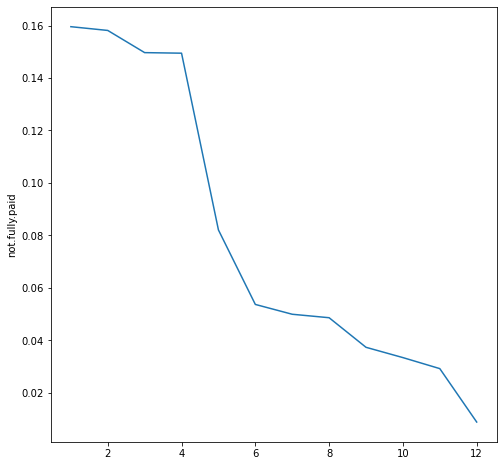

In [328]:
plt.figure(figsize=(8,8))
sns.lineplot(
    x = list(range(1, len(feature_class_corr) + 1)),
    y = feature_class_corr,
    markers = True
)

### Final Dataset

In [329]:
features = feature_class_corr[0:7].index
purpose = purpose_class_corr[0:2].index
            
X = pd.concat([df[features], purpose_df[purpose]], axis=1).copy()
y = df['not.fully.paid']
X

,int.rate,credit.policy,fico,inq.last.6mths,revol.util,revol.bal,installment,purpose_small_business,purpose_credit_card
0,0.1189,1,737,0,52.1,28854,829.10,0,0
1,0.1071,1,707,0,76.7,33623,228.22,0,1
2,0.1357,1,682,1,25.6,3511,366.86,0,0
3,0.1008,1,712,1,73.2,33667,162.34,0,0
4,0.1426,1,667,0,39.5,4740,102.92,0,1
...,...,...,...,...,...,...,...,...,...
9573,0.1461,0,672,2,82.1,215372,344.76,0,0
9574,0.1253,0,722,5,1.1,184,257.70,0,0
9575,0.1071,0,687,8,82.9,10036,97.81,0,0
9576,0.1600,0,692,5,3.2,0,351.58,0,0


### Data Splitting and Feature Scaling

In [330]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_train['not.fully.paid'].value_counts()

0    5637
1    1067
Name: not.fully.paid, dtype: int64

In [361]:
from sklearn.utils import resample

majority = Xy_train[Xy_train['not.fully.paid'] == 0]
minority = Xy_train[Xy_train['not.fully.paid'] == 1]

minority_upsampled = resample(
    minority,
    replace = True,
    n_samples = len(majority),
    random_state = 42
)
Xy_train_balanced = pd.concat([majority, minority_upsampled], ignore_index=True)
Xy_train_balanced['not.fully.paid'].value_counts()

0    5637
1    5637
Name: not.fully.paid, dtype: int64

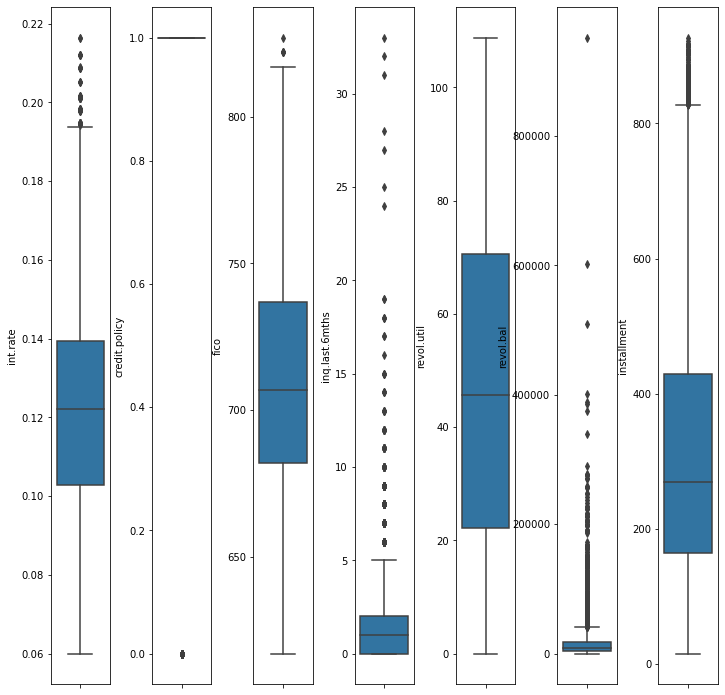

In [332]:
fig, axes = plt.subplots(1, 7, figsize=(10, 10))
fig.tight_layout()

for idx, col_name in enumerate(X_train.columns[0:7]):
    sns.boxplot(ax = axes[idx], data=X_train, y=col_name, orient="v")

In [333]:
Xy_train_balanced['revol.bal'] = np.log(df['revol.bal'] + 1) + 1

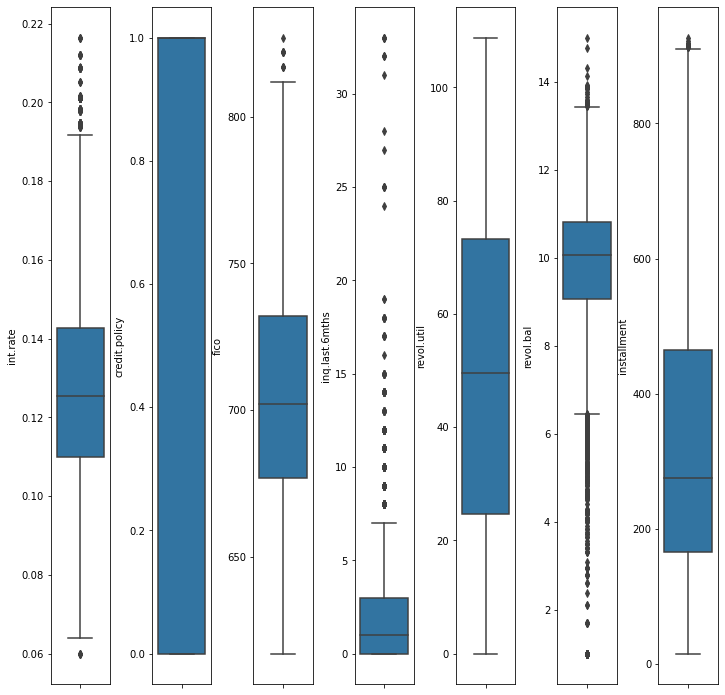

In [334]:
fig, axes = plt.subplots(1, 7, figsize=(10, 10))
fig.tight_layout()

for idx, col_name in enumerate(Xy_train_balanced.columns[0:7]):
    sns.boxplot(ax = axes[idx], data=Xy_train_balanced, y=col_name, orient="v")

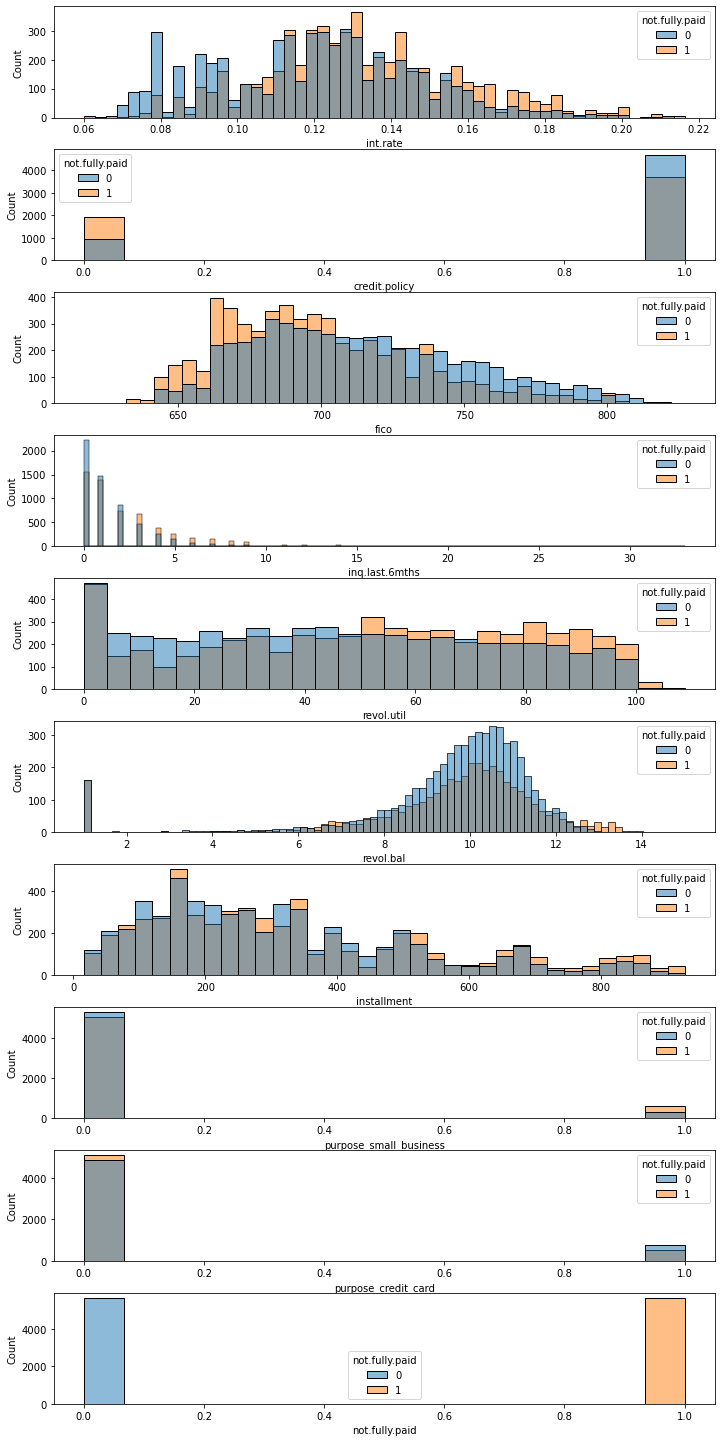

In [335]:
fig, axes = plt.subplots(len(Xy_train_balanced.columns), 1, figsize=(10, 20))
fig.tight_layout()

for idx, col_name in enumerate(Xy_train_balanced.columns):
    sns.histplot(ax = axes[idx], data=Xy_train_balanced, x=col_name, hue='not.fully.paid')

## III. Machine Learning Model Fitting

In [336]:
class model:
    
    def __init__(self, classifier, dataset):
        self.classifier = classifier
        self.X_train = dataset['X_train']
        self.y_train = dataset['y_train']
        self.X_test = dataset['X_test']
        self.y_test = dataset['y_test']
        self.y_pred = None
        self.fit_model()
        self.predict_test_data()
        
    def fit_model(self):
        self.classifier.fit(self.X_train, self.y_train)
        
    def predict_test_data(self):
        self.y_pred = self.classifier.predict(self.X_test)
        
    def print_classification_report(self):
        print('Classification Report\n')
        print(classification_report(self.y_test, self.y_pred))
        
    def get_cross_val_scores(self):
        return cross_val_score(self.classifier, self.X_test, self.y_test, cv=5)
    
    def get_cross_val_score_mean(self):
        return self.get_cross_val_scores().mean()
    
    def print_cross_validation(self):
        print(f'Cross Validation Scores: {self.get_cross_val_scores()}')
        print(f'Cross Validation Score Mean: {self.get_cross_val_score_mean()}')
        
    def get_confusion_matrix(self):
        return confusion_matrix(self.y_test, self.y_pred)
        
    def plot_confusion_matrix(self, labels):
        conf_matrix_df = pd.DataFrame(self.get_confusion_matrix())
        ax = plt.subplot()
        sns.heatmap(conf_matrix_df, annot=True, 
                    fmt='g', ax=ax, cmap='Greens')
        
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title('Confusion Matrix')
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    
    def get_test_prediction_accuracy(self):
        return metrics.accuracy_score(self.y_pred, self.y_test) * 100
    
    def print_test_prediction_accuracy(self):
        print(f'Test-Prediction Accuracy Score: {self.get_test_prediction_accuracy()}')
        
    def get_roc_auc_score(self):
        return roc_auc_score(self.y_test, self.y_pred)

In [362]:
# reassign X_train and y_train values
X_train = Xy_train_balanced.drop('not.fully.paid', axis=1)
y_train = Xy_train_balanced['not.fully.paid']

dataset = {'X_train': X_train, 'y_train': y_train, 
           'X_test': X_test, 'y_test': y_test}

In [363]:
X_train[X_train.isnull().values == True]

,int.rate,credit.policy,fico,inq.last.6mths,revol.util,revol.bal,installment,purpose_small_business,purpose_credit_card


In [364]:
X_train['revol.bal'].replace(np.NaN, 0, inplace = True)

In [365]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression()
log_reg_model = model(log_reg_clf, dataset)
log_reg_model.print_test_prediction_accuracy()
# 63.848295059151006

Test-Prediction Accuracy Score: 63.18719554627697


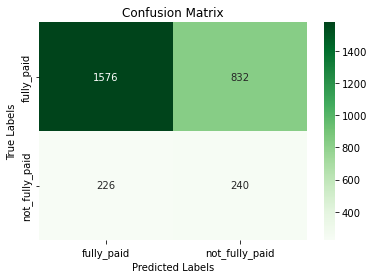

In [366]:
labels = ['fully_paid', 'not_fully_paid']
log_reg_model.plot_confusion_matrix(labels)

In [367]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve

def evaluation(clf, X, y):
    y_predict_proba = clf.predict_proba(X)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y, y_predict_proba)
    fpr, tpr, thresholds = roc_curve(y, y_predict_proba)
    
    return {
        'ROC AUC': auc(fpr, tpr),
        'PR AUC': auc(recall, precision)
    }

In [368]:
evaluation(log_reg_clf, X, y)

{'ROC AUC': 0.6391292132439956, 'PR AUC': 0.2549650903197833}

In [369]:
log_reg_model.get_roc_auc_score()

0.5847532545306774

In [370]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier();
mlp_model = model(mlp_clf, dataset)
mlp_model.print_test_prediction_accuracy()

Test-Prediction Accuracy Score: 69.72860125260961
